In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from preprocessingfunction import *

In [94]:
train_df=pd.read_excel('FlightPrediction/Data_Train.xlsx')

In [95]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [96]:
train_df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [97]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [98]:
train_df.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [99]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [100]:
train_df.duplicated().sum()

220

In [101]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [102]:
train_df.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [103]:
train_df.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [104]:
train_df.Date_of_Journey.unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

In [105]:
train_df.Date_of_Journey.nunique()

44

In [106]:
train_df.Date_of_Journey

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10683, dtype: object

In [107]:
train_df.Date_of_Journey.str.split("/")

0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678     [9, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682     [9, 05, 2019]
Name: Date_of_Journey, Length: 10683, dtype: object

In [108]:
train_df['Date']=train_df.Date_of_Journey.str.split("/").str[0]
train_df['Month']=train_df.Date_of_Journey.str.split("/").str[1]
train_df['Year']=train_df.Date_of_Journey.str.split("/").str[2]

train_df['Date']=train_df['Date'].astype(int)
train_df['Month']=train_df['Month'].astype(int)
train_df['Year']=train_df['Year'].astype(int)

In [109]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [110]:
train_df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [111]:
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [112]:
train_df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [113]:
train_df.shape

(10683, 13)

In [114]:
train_df.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [115]:
train_df.Destination.value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [116]:
train_df.Dep_Time.unique()

array(['22:20', '05:50', '09:25', '18:05', '16:50', '09:00', '18:55',
       '08:00', '08:55', '11:25', '09:45', '20:20', '11:40', '21:10',
       '17:15', '16:40', '08:45', '14:00', '20:15', '16:00', '14:10',
       '22:00', '04:00', '21:25', '21:50', '07:00', '07:05', '09:50',
       '14:35', '10:35', '15:05', '14:15', '06:45', '20:55', '11:10',
       '05:45', '19:00', '23:05', '11:00', '09:35', '21:15', '23:55',
       '19:45', '08:50', '15:40', '06:05', '15:00', '13:55', '05:55',
       '13:20', '05:05', '06:25', '17:30', '08:20', '19:55', '06:30',
       '14:05', '02:00', '09:40', '08:25', '20:25', '13:15', '02:15',
       '16:55', '20:45', '05:15', '19:50', '20:00', '06:10', '19:30',
       '04:45', '12:55', '18:15', '17:20', '15:25', '23:00', '12:00',
       '14:45', '11:50', '11:30', '14:40', '19:10', '06:00', '23:30',
       '07:35', '13:05', '12:30', '15:10', '12:50', '18:25', '16:30',
       '00:40', '06:50', '13:00', '19:15', '01:30', '17:00', '10:00',
       '19:35', '15:

In [117]:
train_df['Dep_Hour']=train_df['Dep_Time'].str.split(':').str[0]
train_df['Dep_Min']=train_df['Dep_Time'].str.split(':').str[1]

In [118]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Date             10683 non-null  int32 
 11  Month            10683 non-null  int32 
 12  Year             10683 non-null  int32 
 13  Dep_Hour         10683 non-null  object
 14  Dep_Min          10683 non-null  object
dtypes: int32(3), int64(1), object(11)
memory usage: 1.1+ MB


In [119]:
train_df['Dep_Hour']=train_df['Dep_Hour'].astype(int)
train_df['Dep_Min']=train_df['Dep_Min'].astype(int)

In [120]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Date             10683 non-null  int32 
 11  Month            10683 non-null  int32 
 12  Year             10683 non-null  int32 
 13  Dep_Hour         10683 non-null  int32 
 14  Dep_Min          10683 non-null  int32 
dtypes: int32(5), int64(1), object(9)
memory usage: 1.0+ MB


In [121]:
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [122]:
train_df.drop(['Dep_Time'],axis=1,inplace=True)

In [123]:
train_df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [124]:
train_df.Arrival_Time.unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '06:50 10 Mar',
       '00:05 19 Mar', '21:20 13 Mar'], dtype=object)

In [125]:
train_df.Arrival_Time.nunique()

1343

In [126]:
train_df.Arrival_Time=train_df.Arrival_Time.apply(lambda x:x.split(' ')[0])

In [127]:
train_df['Arv_Hour']=train_df['Arrival_Time'].str.split(':').str[0]
train_df['Arv_Min']=train_df['Arrival_Time'].str.split(':').str[1]

train_df['Arv_Hour']=train_df['Arv_Hour'].astype(int)
train_df['Arv_Min']=train_df['Arv_Min'].astype(int)

In [128]:
train_df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Min,Arv_Hour,Arv_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [129]:
train_df.drop(['Arrival_Time'],axis=1,inplace=True)

In [130]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Min,Arv_Hour,Arv_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [131]:
train_df.Duration.unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [132]:
train_df['Duration_hrs']=train_df.Duration.apply(lambda x:x.split('h')[0])

In [133]:
train_df[train_df['Duration_hrs']=='5m']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Min,Arv_Hour,Arv_Min,Duration_hrs
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2 stops,No info,17327,6,3,2019,16,50,16,55,5m


In [134]:
train_df.drop(6474,axis=0,inplace=True)

In [135]:
train_df[train_df['Duration_hrs']=='5m']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Min,Arv_Hour,Arv_Min,Duration_hrs


In [136]:
train_df['Duration_hrs']=train_df['Duration_hrs'].astype(int)

In [137]:
train_df.drop(['Duration'],axis=1,inplace=True)

In [138]:
train_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Min,Arv_Hour,Arv_Min,Duration_hrs
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4


In [139]:
train_df['Total_Stops'].isnull().sum()

1

In [140]:
train_df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1519
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [141]:
train_df['Total_Stops'].mode()[0]

'1 stop'

In [142]:
#fill_missing_values(train_df,fill_value=0,fill_types=["Mode_Fill"],columns=['Total_Stops'],dataframe_name="Train")

In [143]:
train_df['Total_Stops'].fillna(train_df['Total_Stops'].mode()[0],inplace=True)

In [144]:
train_df['Total_Stops'].isnull().sum()

0

In [145]:
train_df.drop(['Route'],axis=1,inplace=True)

In [146]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Min,Arv_Hour,Arv_Min,Duration_hrs
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,22,20,1,10,2
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,5,50,13,15,7
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,2019,9,25,4,25,19
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,2019,18,5,23,30,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,2019,16,50,21,35,4


In [147]:
train_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [148]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder_airline=LabelEncoder()
LabelEncoder_Source=LabelEncoder()
LabelEncoder_Destination=LabelEncoder()
LabelEncoder_Total_Stops=LabelEncoder()
LabelEncoder_Additional_Info=LabelEncoder()

In [149]:
train_df['Airline']=LabelEncoder_airline.fit_transform(train_df['Airline'])
train_df['Source']=LabelEncoder_Source.fit_transform(train_df['Source'])
train_df['Destination']=LabelEncoder_Destination.fit_transform(train_df['Destination'])
train_df['Total_Stops']=LabelEncoder_Total_Stops.fit_transform(train_df['Total_Stops'])
train_df['Additional_Info']=LabelEncoder_Additional_Info.fit_transform(train_df['Additional_Info'])

In [150]:
LabelEncoder_airline.fit_transform(train_df['Airline'])

array([ 3,  1,  4, ...,  4, 10,  1], dtype=int64)

In [151]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Min,Arv_Hour,Arv_Min,Duration_hrs
0,3,0,5,4,8,3897,24,3,2019,22,20,1,10,2
1,1,3,0,1,8,7662,1,5,2019,5,50,13,15,7
2,4,2,1,1,8,13882,9,6,2019,9,25,4,25,19
3,3,3,0,0,8,6218,12,5,2019,18,5,23,30,5
4,3,0,5,0,8,13302,1,3,2019,16,50,21,35,4


In [152]:
#Outliers

train_df['Dep_Hour'].mean()

12.490357610934282

In [153]:
train_df['Dep_Hour'].std()

5.748818946566094

In [154]:
#dropping the outliers rows with std
#mean+3* std --> upperlimit
#mean-3* std --> lowerlimit

upperlimit=train_df['Dep_Hour'].mean()+3*train_df['Dep_Hour'].std()
lowerlimit=train_df['Dep_Hour'].mean()-3*train_df['Dep_Hour'].std()

In [155]:
upperlimit

29.736814450632565

In [156]:
lowerlimit

-4.7560992287640005

In [157]:
train_df['Dep_Hour']<upperlimit

0        True
1        True
2        True
3        True
4        True
         ... 
10678    True
10679    True
10680    True
10681    True
10682    True
Name: Dep_Hour, Length: 10682, dtype: bool

In [158]:
upperlimit=train_df['Price'].mean()+3*train_df['Price'].std()
lowerlimit=train_df['Price'].mean()-3*train_df['Price'].std()

In [159]:
upperlimit

22918.94982142857

In [160]:
lowerlimit

-4746.364350542966

In [161]:
train_df[train_df['Price']<upperlimit]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Min,Arv_Hour,Arv_Min,Duration_hrs
0,3,0,5,4,8,3897,24,3,2019,22,20,1,10,2
1,1,3,0,1,8,7662,1,5,2019,5,50,13,15,7
2,4,2,1,1,8,13882,9,6,2019,9,25,4,25,19
3,3,3,0,0,8,6218,12,5,2019,18,5,23,30,5
4,3,0,5,0,8,13302,1,3,2019,16,50,21,35,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,4,8,4107,9,4,2019,19,55,22,25,2
10679,1,3,0,4,8,4145,27,4,2019,20,45,23,20,2
10680,4,0,2,4,8,7229,27,4,2019,8,20,11,20,3
10681,10,0,5,4,8,12648,1,3,2019,11,30,14,10,2


In [162]:
train_df['Price'].max()

79512

In [163]:
train_df.shape

(10682, 14)

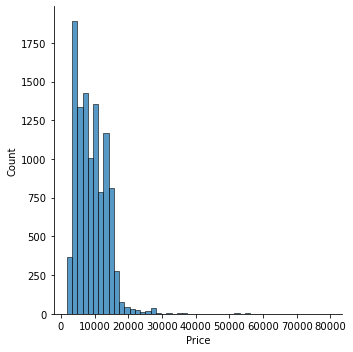

In [164]:
sns.displot(train_df['Price'],bins=50)

c:\Users\ALEX ZACHARIAH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

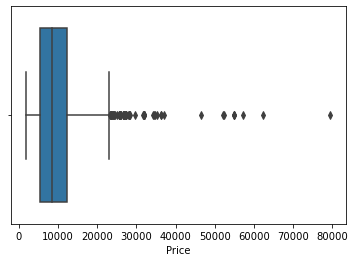

In [165]:
sns.boxplot('Price',data=train_df)

In [166]:
#dropping the outliers rows with percentiles

uplimit=train_df['Price'].quantile(0.95)
lowlimit=train_df['Price'].quantile(0.05)

In [167]:
train_df[train_df['Price']>uplimit]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Min,Arv_Hour,Arv_Min,Duration_hrs
7,4,0,5,0,8,22270,1,3,2019,8,0,5,5,21
20,2,2,1,0,8,19495,6,3,2019,14,10,19,20,5
38,4,0,5,0,8,19225,6,3,2019,7,0,13,15,6
56,1,0,5,1,8,17345,1,3,2019,8,50,23,55,15
91,6,2,1,0,8,17057,6,3,2019,2,15,13,20,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10580,4,0,5,0,8,17261,6,3,2019,14,5,9,30,19
10625,4,2,1,1,5,19644,9,5,2019,11,40,19,0,7
10645,6,2,1,0,8,17057,3,3,2019,7,5,15,30,8
10668,4,2,1,1,8,21219,9,5,2019,11,40,19,0,7


In [168]:
#drop or cap

upperlimit=train_df['Price'].mean()+3*train_df['Price'].std()
lowerlimit=train_df['Price'].mean()-3*train_df['Price'].std()

In [169]:
train_df.loc[train_df['Price']>upperlimit]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Min,Arv_Hour,Arv_Min,Duration_hrs
123,1,2,1,0,8,27430,1,3,2019,23,0,19,15,20
396,6,2,1,0,8,36983,1,3,2019,12,50,19,15,6
486,4,0,5,0,8,26890,1,3,2019,8,55,15,15,6
510,4,0,5,0,8,26890,1,3,2019,7,0,12,25,5
597,1,4,3,1,8,25139,6,3,2019,9,40,15,15,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,4,4,3,1,8,24210,6,3,2019,19,50,16,50,21
10364,5,0,5,0,3,57209,1,3,2019,9,45,14,25,4
10383,4,0,5,0,8,26890,1,3,2019,7,0,5,5,22
10439,4,0,5,0,8,31825,1,3,2019,18,40,9,0,14


In [170]:
train_df.loc[train_df['Price']>upperlimit,'Price']

123      27430
396      36983
486      26890
510      26890
597      25139
         ...  
10353    24210
10364    57209
10383    26890
10439    31825
10511    26480
Name: Price, Length: 96, dtype: int64

In [171]:
train_df.loc[train_df['Price']>upperlimit,'Price']=upperlimit

c:\Users\ALEX ZACHARIAH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

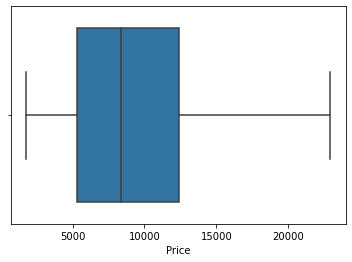

In [172]:
sns.boxplot('Price',data=train_df)

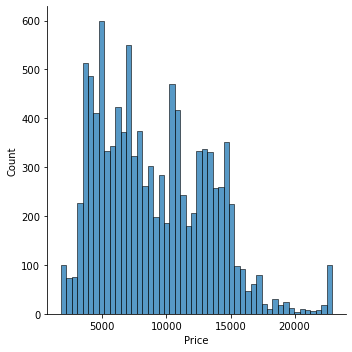

In [173]:
sns.displot(train_df['Price'],bins=50)

In [174]:
train_df['Price'].max()

22918.94982142857